This Project is for FinanceData GWP2 - Part 1.

In [16]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
!pip install -U pandas-ta

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
print("pandas-ta version:", ta.version)

pandas-ta version: 0.4.71b0


In [3]:
#Load the data from Yahoo Finance
tickers = ["ECH", "EWZ", "IVV"]
start_date = "2009-12-12"
end_date = "2020-01-01"
data = yf.download(tickers, start=start_date, end=end_date)

C:\Users\WANG ZHICHONG\AppData\Local\Temp\ipykernel_62020\3844712767.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed


In [4]:
data.head()

Price           Close                             High                        \
Ticker            ECH        EWZ        IVV        ECH        EWZ        IVV   
Date                                                                           
2009-12-14  36.614758  39.013981  83.898170  36.769165  39.148789  83.995351   
2009-12-15  36.487194  38.664505  83.494492  36.641604  39.118851  83.943024   
2009-12-16  36.527493  38.504730  83.651512  36.923582  39.133824  84.092567   
2009-12-17  36.393211  36.722282  82.590004  36.467059  37.805726  83.180568   
2009-12-18  36.514065  36.847099  83.113289  36.594625  37.131691  83.165618   

Price             Low                             Open                        \
Ticker            ECH        EWZ        IVV        ECH        EWZ        IVV   
Date                                                                           
2009-12-14  36.185102  38.754355  83.524393  36.319367  39.088874  83.913119   
2009-12-15  36.420061  38.569640  83.255274  36.420061  38.714433  83.614098   
2009-12-16  36.453645  38.285044  83.464623  36.923582  38.869205  83.860827   
2009-12-17  35.983695  36.622423  82.560101  36.010549  37.635968  83.038537   
2009-12-18  35.916575  36.372778  82.395636  36.594625  36.552520  83.083386   

Price       Volume                     
Ticker         ECH       EWZ      IVV  
Date                                   
2009-12-14  212300  10448900  3201000  
2009-12-15  122100  12549400  2537100  
2009-12-16  201500  13657200  2842400  
2009-12-17   72300  21065300  7247700  
2009-12-18  104900  17023200  4320400

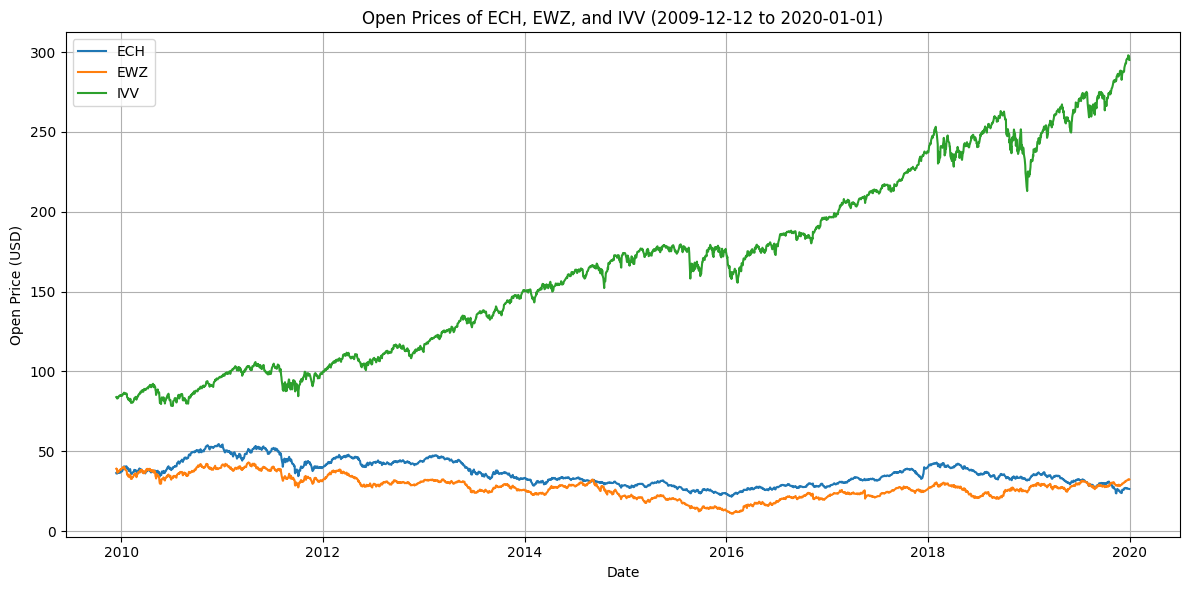

In [5]:
#Plot the time series data
open_prices = data['Open']

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(open_prices.index, open_prices[ticker], label=ticker)

plt.title("Open Prices of ECH, EWZ, and IVV (2009-12-12 to 2020-01-01)")
plt.xlabel("Date")
plt.ylabel("Open Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
data.describe()

Price         Close                                   High               \
Ticker          ECH          EWZ          IVV          ECH          EWZ   
count   2529.000000  2529.000000  2529.000000  2529.000000  2529.000000   
mean      35.991070    27.492300   166.032124    36.253020    27.762253   
std        7.566955     6.866096    58.831423     7.610454     6.908281   
min       21.728765    10.742724    77.783752    21.882818    10.990681   
25%       29.979759    22.867788   108.925301    30.188964    23.196430   
50%       34.665733    27.687157   165.642639    34.945142    27.981780   
75%       41.893604    31.425499   212.740128    42.191489    31.665058   
max       54.564632    42.735176   297.262848    54.615962    42.976212   

Price                        Low                                   Open  \
Ticker          IVV          ECH          EWZ          IVV          ECH   
count   2529.000000  2529.000000  2529.000000  2529.000000  2529.000000   
mean     166.738741    35.722179    27.208394   165.175509    36.003197   
std       59.007512     7.522988     6.820111    58.647577     7.564936   
min       78.670759    18.369620    10.724127    66.732521    21.494017   
25%      109.480300    29.783683    22.653578   108.089508    29.949157   
50%      166.280372    34.468203    27.404003   164.664017    34.726509   
75%      213.333928    41.602893    31.033799   212.016760    41.882641   
max      298.060230    54.153921    42.440549   296.703693    54.527633   

Price                                   Volume                              
Ticker          EWZ          IVV           ECH           EWZ           IVV  
count   2529.000000  2529.000000  2.529000e+03  2.529000e+03  2.529000e+03  
mean      27.505045   166.010775  2.992277e+05  1.934481e+07  4.020080e+06  
std        6.873850    58.838525  2.230114e+05  9.919088e+06  2.219907e+06  
min       10.841907    78.450887  2.670000e+04  2.085900e+06  7.058000e+05  
25%       22.933402   108.773129  1.525000e+05  1.309310e+07  2.642000e+06  
50%       27.717872   165.626223  2.373000e+05  1.714410e+07  3.475000e+06  
75%       31.406196   212.835876  3.799000e+05  2.294540e+07  4.735800e+06  
max       42.906574   298.060230  1.977400e+06  1.666068e+08  3.874850e+07

In [7]:
data['Open'].describe()

Ticker,ECH,EWZ,IVV
count,2529.000000,2529.000000,2529.000000
mean,36.003197,27.505045,166.010775
std,7.564936,6.873850,58.838525
min,21.494017,10.841907,78.450887
25%,29.949157,22.933402,108.773129
50%,34.726509,27.717872,165.626223
75%,41.882641,31.406196,212.835876
max,54.527633,42.906574,298.060230


In [24]:
#panda ta to extract features
data.ta.study(ta.AllStudy)

print(data.shape)
print(list(data.columns)[:10])
data.to_csv("technical_features.csv", index=True)
data.head()

AttributeError: Can only use .str accessor with Index, not MultiIndex

In [54]:
#Class assingment
returns = open_prices.pct_change().dropna()
Gamma = ((returns > 0).astype(int) * 2 - 1).dropna()
print(returns.head())


Ticker           ECH       EWZ       IVV
Date                                    
2009-12-15  0.002773 -0.009580 -0.003563
2009-12-16  0.013825  0.003998  0.002950
2009-12-17 -0.024727 -0.031727 -0.009806
2009-12-18  0.016219 -0.028788  0.000540
2009-12-21 -0.005687  0.016255  0.005038


In [55]:
Gamma.head()

Ticker,ECH,EWZ,IVV
Date,,,
2009-12-15,1,-1,-1
2009-12-16,1,1,1
2009-12-17,-1,-1,-1
2009-12-18,1,-1,1
2009-12-21,-1,1,1


In [56]:
Gamma.describe()

Ticker,ECH,EWZ,IVV
count,2528.000000,2528.000000,2528.000000
mean,-0.004747,0.021361,0.128165
std,1.000187,0.999970,0.991949
min,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000
50%,-1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


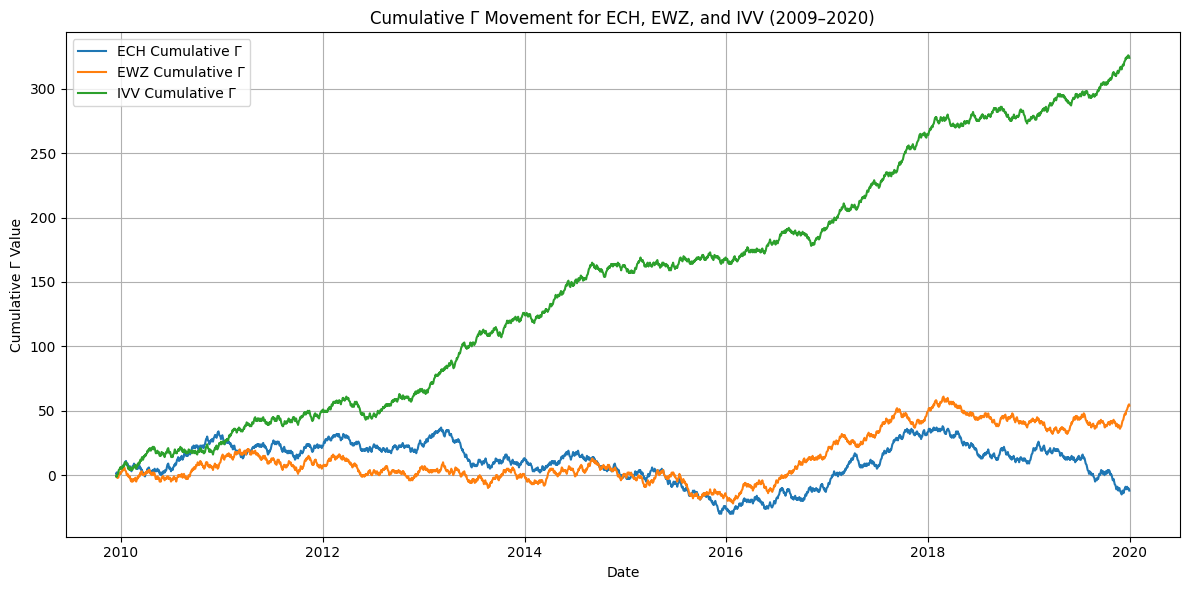

In [57]:
#Plot the Gamma cumulative sum time series
Gamma_cum = Gamma.cumsum()

plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(Gamma_cum.index, Gamma_cum[ticker], label=f"{ticker} Cumulative Γ")

plt.title("Cumulative Γ Movement for ECH, EWZ, and IVV (2009–2020)")
plt.xlabel("Date")
plt.ylabel("Cumulative Γ Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# min-max normalization
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(
    scaler.fit_transform(data.values.reshape(-1, len(data.columns.levels[0])*len(tickers))),
    index=data.index,
    columns=pd.MultiIndex.from_product(data.columns.levels)
)
#add Gamma to normalized data
data_normalized = pd.concat([data_normalized, pd.concat({'Gamma': Gamma}, axis=1)], axis=1).dropna()
data_normalized.head()

Close                          High                      \
Ticker           ECH       EWZ       IVV       ECH       EWZ       IVV   
Date                                                                     
2009-12-15  0.449461  0.872762  0.026020  0.450883  0.879402  0.024032   
2009-12-16  0.450688  0.867767  0.026735  0.459496  0.879871  0.024713   
2009-12-17  0.446599  0.812053  0.021898  0.445550  0.838349  0.020556   
2009-12-18  0.450279  0.815955  0.024283  0.449447  0.817276  0.020488   
2009-12-21  0.454572  0.809244  0.027791  0.451908  0.824925  0.025258   

                 Low                          Open                      \
Ticker           ECH       EWZ       IVV       ECH       EWZ       IVV   
Date                                                                     
2009-12-15  0.504424  0.877952  0.071847  0.451845  0.869259  0.023511   
2009-12-16  0.505362  0.868979  0.072757  0.467087  0.874086  0.024634   
2009-12-17  0.492229  0.816558  0.068824  0.439448  0.835626  0.020890   
2009-12-18  0.490353  0.808686  0.068109  0.457128  0.801836  0.021094   
2009-12-21  0.499921  0.811520  0.072887  0.450828  0.820366  0.023000   

              Volume                     Gamma            
Ticker           ECH       EWZ       IVV   ECH  EWZ  IVV  
Date                                                      
2009-12-15  0.048906  0.063600  0.048138   1.0 -1.0 -1.0  
2009-12-16  0.089609  0.070333  0.056163   1.0  1.0  1.0  
2009-12-17  0.023376  0.115362  0.171962  -1.0 -1.0 -1.0  
2009-12-18  0.040088  0.090793  0.095014   1.0 -1.0  1.0  
2009-12-21  0.014354  0.068231  0.051773  -1.0  1.0  1.0

In [60]:
#data cleaning
data_normalized = data_normalized.dropna()
data_normalized.describe()

Close                                   High               \
Ticker          ECH          EWZ          IVV          ECH          EWZ   
count   2528.000000  2528.000000  2528.000000  2528.000000  2528.000000   
mean       0.434344     0.523405     0.402229     0.439005     0.524208   
std        0.230493     0.214539     0.268000     0.232546     0.215908   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.251229     0.378964     0.141996     0.253735     0.381535   
50%        0.393871     0.529559     0.400325     0.398700     0.531205   
75%        0.614164     0.646169     0.614899     0.620432     0.646118   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

                             Low                                   Open  \
Ticker          IVV          ECH          EWZ          IVV          ECH   
count   2528.000000  2528.000000  2528.000000  2528.000000  2528.000000   
mean       0.401572     0.484916     0.519595     0.428207     0.439221   
std        0.268911     0.210273     0.214954     0.254974     0.229052   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.140594     0.318861     0.375823     0.179840     0.255945   
50%        0.399367     0.449711     0.525733     0.425878     0.400421   
75%        0.613888     0.649364     0.640147     0.631825     0.617336   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

                                       Volume                            \
Ticker          EWZ          IVV          ECH          EWZ          IVV   
count   2528.000000  2528.000000  2528.000000  2528.000000  2528.000000   
mean       0.519530     0.398855     0.139725     0.104925     0.087129   
std        0.214296     0.267873     0.114343     0.060293     0.058363   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.376733     0.138369     0.064477     0.066917     0.050891   
50%        0.526166     0.397013     0.108089     0.091536     0.072835   
75%        0.641107     0.611967     0.181102     0.126795     0.105950   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

              Gamma                            
Ticker          ECH          EWZ          IVV  
count   2528.000000  2528.000000  2528.000000  
mean      -0.004747     0.021361     0.128165  
std        1.000187     0.999970     0.991949  
min       -1.000000    -1.000000    -1.000000  
25%       -1.000000    -1.000000    -1.000000  
50%       -1.000000     1.000000     1.000000  
75%        1.000000     1.000000     1.000000  
max        1.000000     1.000000     1.000000

In [ ]:
#MLP 
y = data_normalized['Gamma']
X = data_normalized.drop(columns='Gamma', level=0)
hidden_layer_sizes = int((data_normalized.shape[1] + len(np.unique(Gamma)))/2)
MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, 
              activation='logistic',
              solver='lbfgs', 
              batch_size='auto', 
              learning_rate='adaptive',
              learning_rate_init=0.03, 
              max_iter=5000, 
              momentum=0.2,
              random_state=np.random.get_state()[1][0], 
              early_stopping=False)
# 使用nof_folds=10对训练样本进行交叉验证
cv_generator = StratifiedKFold(n_splits=10, shuffle=False)